<a href="https://colab.research.google.com/github/Samyoroop-Ghosh/Python/blob/main/Python_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Dependencies**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**2. Loading the dataset**

In [ ]:
flower_data = pd.read_csv('/content/iris.data')

**3. Summarizing the dataset**


Dimensions of the dataset



In [ ]:
flower_data.shape

(149, 5)

Peek at the data itself

In [ ]:
flower_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Checking for blanks

In [ ]:
flower_data.isnull().sum()

,0
5.1,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


Statistical summary of all attributes

In [ ]:
flower_data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Breakdown of the data by the class variable

In [ ]:
flower_data.groupby('Iris-setosa').size()

,0
Iris-setosa,
Iris-setosa,49
Iris-versicolor,50
Iris-virginica,50


**4.	Visualizing the dataset**

Univariate Plot for '5.1' (lineplot)

<Axes: ylabel='5.1'>

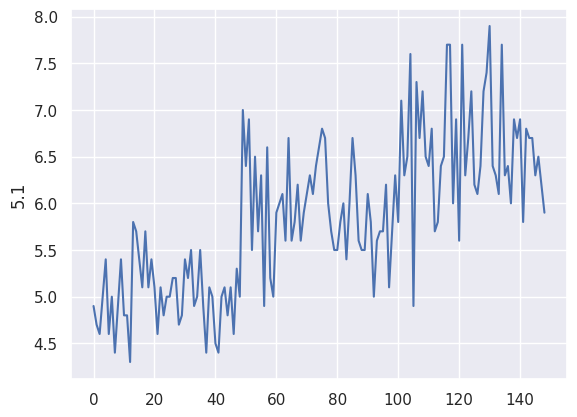

In [ ]:
sns.lineplot(flower_data['5.1'])

Univariate Plot for '3.5' (barplot)

<Axes: ylabel='3.5'>

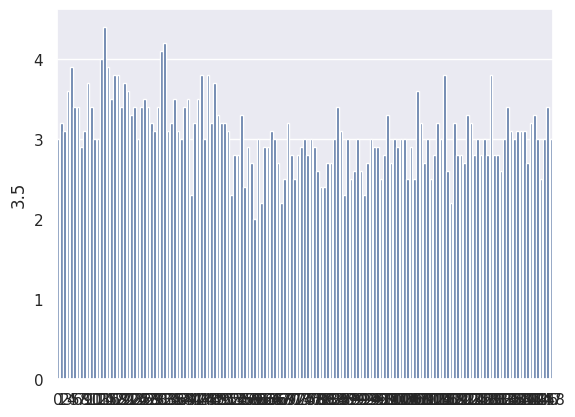

In [ ]:
sns.barplot(flower_data['3.5'])

Univariate Plot for '1.4' (jointplot)

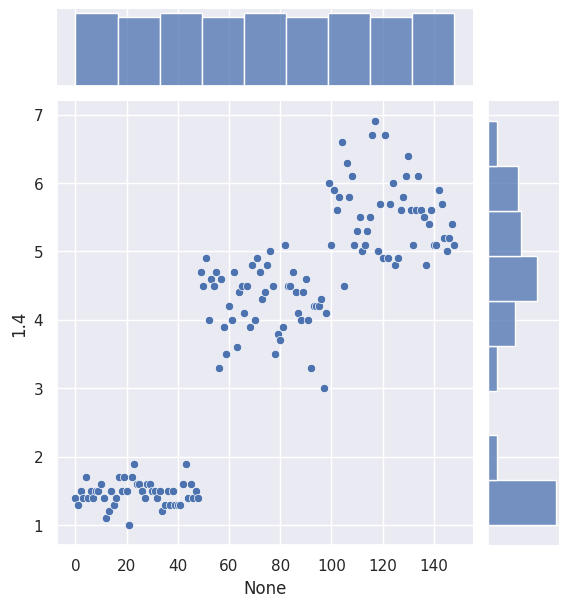

In [ ]:
sns.jointplot(flower_data['1.4'])

Univariate Plot for '0.2' (histplot)

<Axes: xlabel='0.2', ylabel='Count'>

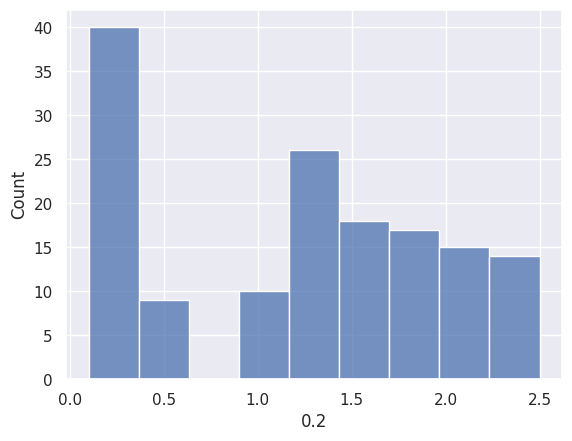

In [ ]:
sns.histplot(flower_data['0.2'])

Univariate Plot for 'Iris-setosa' (pointplot)

<Axes: ylabel='Iris-setosa'>

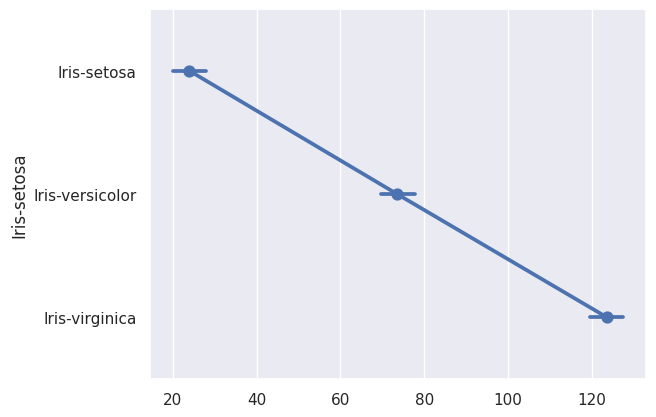

In [ ]:
sns.pointplot(flower_data['Iris-setosa'])

Multivariate plot for '5.1' vs 'Iris-setosa' (boxplot)

<Axes: xlabel='5.1', ylabel='Iris-setosa'>

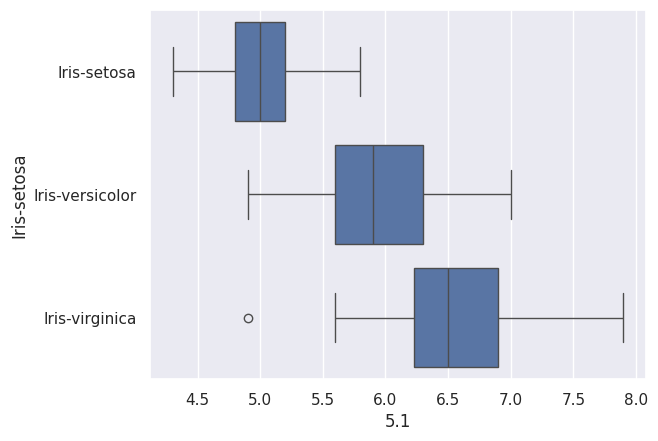

In [ ]:
sns.boxplot(flower_data, x='5.1', y='Iris-setosa')

Multivariate plot for '3.5' vs 'Iris-setosa' (boxplot)

<Axes: xlabel='3.5', ylabel='Iris-setosa'>

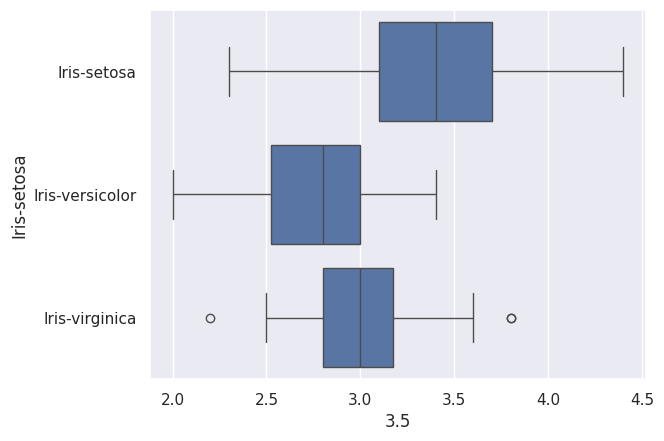

In [ ]:
sns.boxplot(flower_data, x='3.5', y='Iris-setosa')

Multivariate plot for '1.4' vs 'Iris-setosa' (boxplot)

<Axes: xlabel='1.4', ylabel='Iris-setosa'>

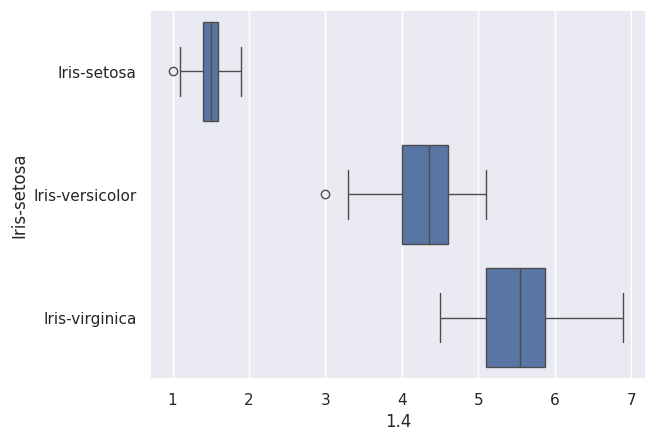

In [ ]:
sns.boxplot(flower_data, x='1.4', y='Iris-setosa')

Multivariate plot for '0.2' vs 'Iris-setosa' (boxplot)

<Axes: xlabel='0.2', ylabel='Iris-setosa'>

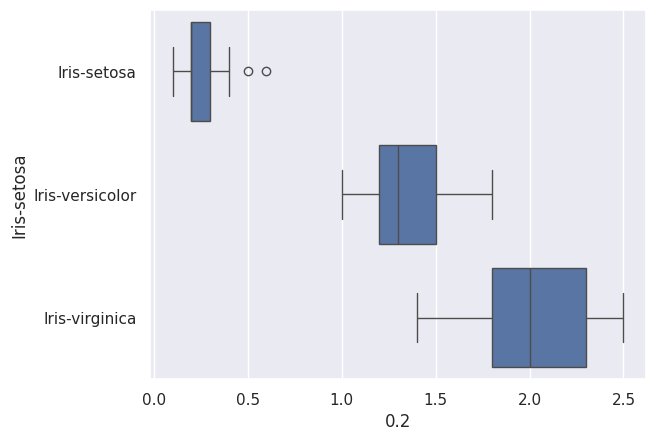

In [ ]:
sns.boxplot(flower_data, x='0.2', y='Iris-setosa')

**5.	Evaluating some algorithms**

Separate out a validation dataset

In [ ]:
Y = flower_data['Iris-setosa']
X = flower_data.drop('Iris-setosa', axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(119, 4) (30, 4) (119,) (30,)


Logistic Regression (LR) Model

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
lr_score = model_lr.score(X_test, Y_test)
print(f"Logistic Regression Accuracy: {lr_score:.2f}")

Logistic Regression Accuracy: 1.00


Linear Discriminant Analysis (LDA) Model

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, Y_train)
lda_score = model_lda.score(X_test, Y_test)
print(f"Linear Discriminant Analysis Accuracy: {lda_score:.2f}")

Linear Discriminant Analysis Accuracy: 1.00


K-Nearest Neighbors (KNN) Model

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
knn_score = model_knn.score(X_test, Y_test)
print(f"K-Nearest Neighbors Accuracy: {knn_score:.2f}")

K-Nearest Neighbors Accuracy: 0.97


Classification and Regression Trees (CART) Model

In [ ]:
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, Y_train)
cart_score = model_cart.score(X_test, Y_test)
print(f"CART Accuracy: {cart_score:.2f}")

CART Accuracy: 0.97


Gaussian Naive Bayes (NB) Model

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)
nb_score = model_nb.score(X_test, Y_test)
print(f"Gaussian Naive Bayes Accuracy: {nb_score:.2f}")

Gaussian Naive Bayes Accuracy: 1.00


Support Vector Machines (SVM) Model

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, Y_train)
svm_score = model_svm.score(X_test, Y_test)
print(f"Support Vector Machines Accuracy: {svm_score:.2f}")

Support Vector Machines Accuracy: 1.00


Comparing the accuracy of the models

In [ ]:
accuracy = [lr_score,lda_score,knn_score,cart_score,nb_score,svm_score]
algorithms = ['Logistic Regression','Linear Discriminant Analysis','K-Nearest Neighbors','Classification and Regression Trees','Gaussian Naive Bayes','Support Vector Machines']
score_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracy Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy Score
0,Logistic Regression,1.000000
1,Linear Discriminant Analysis,1.000000
2,K-Nearest Neighbors,0.966667
3,Classification and Regression Trees,0.966667
4,Gaussian Naive Bayes,1.000000
5,Support Vector Machines,1.000000


Selecting best model

In [ ]:
max_index = accuracy.index(max(accuracy))
best_model = algorithms[max_index]
print(f"Best model: {best_model} \nAccuracy: {max(accuracy):.2f}")

Best model: Logistic Regression 
Accuracy: 1.00


Plotting the accuracies

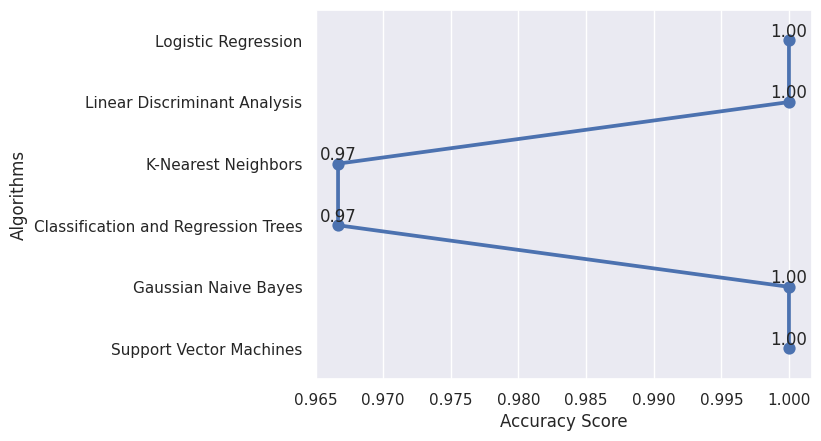

In [ ]:
sns.pointplot(data=score_df, x='Accuracy Score', y='Algorithms')
for i in range(len(score_df)):
    plt.text(score_df['Accuracy Score'][i], i, f'{score_df["Accuracy Score"][i]:.2f}',
             ha='center', va='bottom')

**6.	Making some predictions**

In [ ]:
input_data = (5.8,4.0,1.2,0.2)
input_data_df = pd.DataFrame([input_data], columns=X_train.columns)

models = {
    'Logistic Regression': model_lr,
    'Linear Discriminant Analysis': model_lda,
    'K-Nearest Neighbors': model_knn,
    'Classification and Regression Trees': model_cart,
    'Gaussian Naive Bayes': model_nb,
    'Support Vector Machines': model_svm
}

optimal_model = models[best_model]
prediction = optimal_model.predict(input_data_df)
print(prediction)
print(f"predicted using {best_model}")

['Iris-setosa']
predicted using Logistic Regression
